In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_excel('Concrete_Data.xls')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
X = data.drop(columns = ['Concrete compressive strength(MPa, megapascals) '],axis  =1)
y = data['Concrete compressive strength(MPa, megapascals) ']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.3)

Features have inconsistent units between them, hence there is a need to normalize them to make them dimensionless and improve the performance of machine learning model

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
train = X_train.copy(deep = True)
train['Concrete compressive strength(MPa, megapascals) '] = Y_train

test = X_test.copy(deep = True)
test['Concrete compressive strength(MPa, megapascals) '] = Y_test

scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
test_scaled  = pd.DataFrame(scaler.transform(test),columns = test.columns)
train_scaled['const_col'] = 1
test_scaled['const_col'] = 1

In [9]:
X_train_scaled = train_scaled.drop(columns = ['Concrete compressive strength(MPa, megapascals) '],axis  =1)
y_train_scaled = train_scaled['Concrete compressive strength(MPa, megapascals) ']

X_test_scaled = test_scaled.drop(columns = ['Concrete compressive strength(MPa, megapascals) '],axis  =1)

1. Write a Python program to solve the linear regression problem using the
Normal Equations approach. Compare your results with the results you
obtained in the last homework assignment.


In [10]:
#implementation of Normal equation
X = np.array(X_train_scaled)

#Assuming linear model, we have to first caluculate coefficients
# W = (X^TX)^(-1). X^T. y
Xt = np.transpose(X)
a = np.dot(Xt, X)
W = np.linalg.multi_dot([np.linalg.inv(a),Xt,y_train_scaled])

In [11]:
W

array([ 0.68883891,  0.50258511,  0.22908319, -0.14383944,  0.15357082,
        0.12371383,  0.13888219,  0.52331161, -0.17633223])

**Premilinary observation:**

As all the weights are approximately in the same range, the model that has been fitted is stable and might not have suffered from overfitting(it might very well under fit).

In [12]:
train_scaled_dup =train_scaled.drop(columns = ['const_col'],axis =1)
test_scaled_dup = test_scaled.drop(columns = ['const_col'], axis =1)


In [13]:
def return_predictions(X,W,scaler,train_scaled_dup):
  y_train_predicted = np.dot(X,W)
  #perform inverse transform

  train_scaled_dup['Concrete compressive strength(MPa, megapascals) '] = y_train_predicted

  y_train_predicted = pd.DataFrame(scaler.inverse_transform(train_scaled_dup),columns = train_scaled_dup.columns)['Concrete compressive strength(MPa, megapascals) ']
  return y_train_predicted

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#performing inverse transform on train data
y_train_predicted = return_predictions(X,W,scaler,train_scaled_dup)
mse = mean_squared_error(Y_train,y_train_predicted)
r2 = r2_score(Y_train,y_train_predicted)
print("Mean Squred error for train data: ", mse)
print("Coefficient of determination(R2 score) for train data: ",r2)

Mean Squred error for train data:  112.37588029549325
Coefficient of determination(R2 score) for train data:  0.5961486092683804


In [15]:
#Predictions on test data
X_test  = np.array(X_test_scaled)
y_test_predicted  = np.dot(X_test,W)

#perform inverse transform on test data

y_test_predicted = return_predictions(X_test,W,scaler,test_scaled_dup)
mse = mean_squared_error(Y_test,y_test_predicted)
r2 = r2_score(Y_test,y_test_predicted)
print("Mean Squred error for test data: ", mse)
print("Coefficient of determination(R2 score) for test data: ",r2) 

Mean Squred error for test data:  96.69320796447991
Coefficient of determination(R2 score) for test data:  0.6547271226297383


Thus, the errors are in the same order of magnitude and as the previous assigment. Thus, both the normal equation approach and linear regression approach in the previous assignments gave similar results

2. Introduce L2 regularization into the model and solve this for various values
of the regularization parameter.

    a. Do your results improve or degrade in quality?

    b. Explain the increase or decrease in quality obtained in part a in a
    sentence or two.


In [16]:
r2_train = []
r2_test  = []
mse_train = []
mse_test  = []
alphas = [1e-3,1e-2,1e-1,1,10,100]
for a in  [1e-3,1e-2,1e-1,1,10,100]:
  #implementation of Normal equation
  X = np.array(X_train_scaled)

  #Assuming linear model, we have to first caluculate coefficients
  # W = (X^TX+ lamda*I)^(-1). X^T. y
  Xt = np.transpose(X)
  mat  = np.dot(Xt, X)
  lamdaI = a*np.identity(mat.shape[0])
  mat = mat+lamdaI
  W = np.linalg.multi_dot([np.linalg.inv(mat),Xt,y_train_scaled])
  y_train_predicted = return_predictions(np.array(X_train_scaled),W,scaler,train_scaled_dup) 
  
  r2_train.append(r2_score(Y_train,y_train_predicted))
  mse_train.append(mean_squared_error(Y_train,y_train_predicted))

  y_test_predicted  = return_predictions(np.array(X_test_scaled), W, scaler,test_scaled_dup)
  mse_test.append(mean_squared_error(Y_test,y_test_predicted))
  r2_test.append(r2_score(Y_test,y_test_predicted))

Visualization of Train and Test error for different values of regularization parameter...

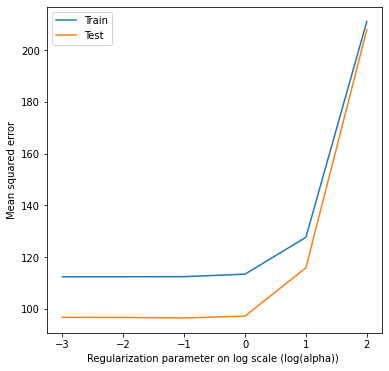

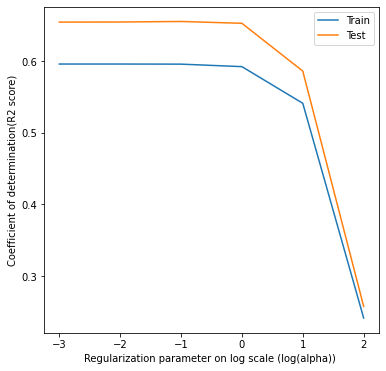

In [17]:
import matplotlib.pyplot as plt
alpha = [-3,-2,-1,0,1,2]
plt.figure(figsize = (6,6))
plt.plot(alpha, mse_train, label = 'Train')
plt.plot(alpha, mse_test, label = 'Test')
plt.legend()
plt.xlabel("Regularization parameter on log scale (log(alpha)) ")
plt.ylabel("Mean squared error")
plt.show()


plt.figure(figsize = (6,6))
plt.plot(alpha, r2_train, label = 'Train')
plt.plot(alpha, r2_test, label = 'Test')
plt.legend()
plt.xlabel("Regularization parameter on log scale (log(alpha)) ")
plt.ylabel("Coefficient of determination(R2 score)")
plt.show()



In [18]:
#best alpha is the argmin(mse_test)
index = mse_test.index(min(mse_test))
best_alpha = alphas[index]
print("Best regularization parameter is: ",best_alpha)
print("r2 score at best regularization parameter is: ", max(r2_test))
print("Mean sqaured error at best regularization parameter is: ", min(mse_test))

Best regularization parameter is:  0.1
r2 score at best regularization parameter is:  0.6556163333219708
Mean sqaured error at best regularization parameter is:  96.44418569825635


**Observations:**

1. L2 regularization(Ridge regression) performed better compared to Linear regression
2. There is a slight improvement in coefficient of determination from 0.6547271226297383 to 0.6556163333219708
3. Mean sqaured error reduced to 96.44418569825635 from 96.69320796447991  (MPa.MPa)

**Conclusion**:

Although not very evident at the first sight, the feature water is highly correlated with other features. Thus L2 regularization works better than simple linear regression. L2 regularization can address multicollinearity in the data set and can reduce overfitting by not allowing the coefficient of variables to blow up.

3. **We now use a quadratic model instead of the linear model.**

      a. How many features does the input have now?

      b. Modify your program for this quadratic model now (without
      regularization)

      c. Do your results improve or degrade in quality?

      d. How many features would you need if this was a cubic model
      instead of quadratic? (You need not program the cubic model)

In [19]:
#Building quadratic features...
temp = train_scaled_dup.drop(columns = ['Concrete compressive strength(MPa, megapascals) '],axis = 1)
X_quad = temp.copy(deep = True)
i = 0
n = len(temp.columns)
for col1 in range(n):
  for col2 in range(col1,n):
    c1 = temp.columns[col1]
    c2 = temp.columns[col2]
    X_quad[str(i)] = temp[c1]*temp[c2]
    i+=1
X_quad['const_col'] = 1

temp = test_scaled_dup.drop(columns = ['Concrete compressive strength(MPa, megapascals) '],axis = 1)
X_test_quad = temp.copy(deep = True)
i = 0
for col1   in range(n):
  for col2 in range(col1,n):
    c1 = temp.columns[col1]
    c2 = temp.columns[col2]
    X_test_quad[str(i)] = temp[c1]*temp[c2]
    i+=1
X_test_quad['const_col'] = 1






In [20]:
X_quad.shape

(721, 45)

Solving for the coefficients of the quadratic model using normal eqation..

In [21]:
X = np.array(X_quad)

# W = (X^TX)^(-1). X^T. y
Xt = np.transpose(X)
a = np.dot(Xt, X)
W_quad = np.linalg.multi_dot([np.linalg.inv(a),Xt,y_train_scaled])

In [22]:
W_quad

array([ 4.441626  ,  3.38114461,  1.50544258,  7.9776871 ,  5.0007047 ,
        3.51229701,  5.99363099,  0.73830662, -0.5215232 , -0.6231956 ,
        0.02297939, -3.38041733, -2.45865434, -0.84414671, -1.79840668,
        0.51429925, -0.41661239,  0.1544281 , -2.54260768, -1.8579401 ,
       -0.88029766, -1.38248552,  0.77969198,  0.08438289, -1.77321567,
       -1.93433038, -0.22688712, -0.4908927 ,  0.78293912, -2.2448264 ,
       -1.95372859, -2.97178946, -4.0930932 ,  0.09759342, -0.55591852,
       -1.59423373, -2.17496747,  0.43431908, -0.45431311, -1.63527021,
       -0.13688252, -1.81590546,  0.50078075, -1.03714199, -5.85030301])

**Observation:**
 
 Since the coefficients did not blow up, we can say our model did not overfit on the training data set.

In [23]:
y_train_predicted = return_predictions(np.array(X_quad),W_quad,scaler,train_scaled_dup) 
  
print("Coefficient of determination for train data is: ",r2_score(Y_train,y_train_predicted))
print("Mean squared error for the train data is: ",mean_squared_error(Y_train,y_train_predicted))


y_test_predicted = return_predictions(np.array(X_test_quad),W_quad,scaler,test_scaled_dup) 
  
print("Coefficient of determination for test data is: ",r2_score(Y_test,y_test_predicted))
print("Mean squared error for the test data is: ",mean_squared_error(Y_test,y_test_predicted))

Coefficient of determination for train data is:  0.8136945008128005
Mean squared error for the train data is:  51.84145692088523
Coefficient of determination for test data is:  0.7796815481933183
Mean squared error for the test data is:  61.69988804568226


Thus,

3a. The input has **45** features if the model is quadratic

3b. The code has been implemented 

3c. The quadratic model performed far better compared to the linear model. Thus, our results improved in quality

3d. If we try to implement a cubic model the feature matrix will have **165** features. In general, the formula for number of features of the input matrix is given by (d+k)Cₖ, where d is the degree of the polynomial and k is number of original features   

The below table summarizes the performance of linear model, L2 regularization and Quadratic model on test data

**Mean squared error:**

|Linear Model|L2 Regularization| Quadratic model|
|:-------|:-------------------:|:---------------|
|96.69320796447991|96.44418569825635|61.69988804568226|


**Coefficient of determination(R2 score)**

|Linear Model|L2 Regularization| Quadratic model|
|:-------|:-------------------:|:---------------|
|0.6547|0.6556|0.7796|